#### Sources 
> 
- machine_learning_mastery_with_python
- master_machine_learning_algorithms

# Simple Linear Regression Tutorial
Linear regression is a very simple method but has proven to be very useful for a large number
of situations. In this chapter you will discover exactly how linear regression works step-by-step.
After reading this chapter you will know:
- How to calculate a simple linear regression step-by-step.
- How to make predictions on new data using your model.
- A shortcut that greatly simplies the calculation.

## Linear Machine Learning Algorithms
This section provides examples of how to use four dierent linear machine learning algorithms
for regression in Python with scikit-learn.

## Linear Regression
Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity). You can construct a linear regression
model using the LinearRegression class1.

In [ ]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## Load Libraries

In [1]:
# Linear Regression
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

x  y
0  1  1
1  2  2
2  3  3
3  4  3
4  5  5

In [3]:
array = dataset.values
X = array[:,0:1]
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [4]:
Y = array[:,1]
Y

array([1, 2, 3, 3, 5])

In [5]:
kfold = KFold(n_splits=2, random_state=7)

In [6]:
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print('mean_squared_error:', results.mean())

mean_squared_error: -5.083333333333331


Running the example provides a estimate of mean squared error.

## Machine Learning Project
in Python Step-By-Step

In [7]:
# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
%matplotlib inline

## Load Dataset
The iris dataset can be downloaded from the UCI Machine Learning repository1. We are using
Pandas to load the data. We will also use Pandas next to explore the data both with descriptive
statistics and data visualization. Note that we are specifying the names of each column when
loading the data. This will help later when we explore the data.

In [8]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

x  y
0  1  1
1  2  2
2  3  3
3  4  3
4  5  5

In [9]:
# shape
print(dataset.shape)

(5, 2)


In [10]:
# head
print(dataset)

   x  y
0  1  1
1  2  2
2  3  3
3  4  3
4  5  5


## Statistical Summary
Now we can take a look at a summary of each attribute. This includes the count, mean, the
min and max values as well as some percentiles.

In [11]:
# descriptions
print(dataset.describe())

              x        y
count  5.000000  5.00000
mean   3.000000  2.80000
std    1.581139  1.48324
min    1.000000  1.00000
25%    2.000000  2.00000
50%    3.000000  3.00000
75%    4.000000  3.00000
max    5.000000  5.00000


In [12]:
# class distribution
print(dataset.groupby('x').size())

x
1    1
2    1
3    1
4    1
5    1
dtype: int64


In [13]:
# class distribution
print(dataset.groupby('y').size())

y
1    1
2    1
3    2
5    1
dtype: int64


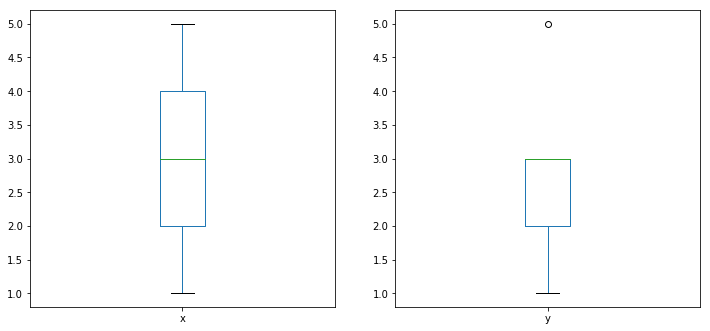

In [14]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12, 12))
pyplot.show()

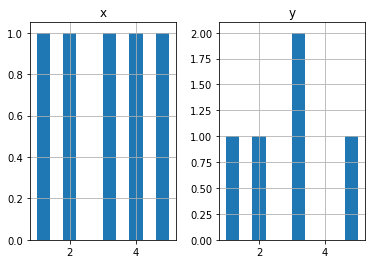

In [15]:
# histograms
dataset.hist()
pyplot.show()

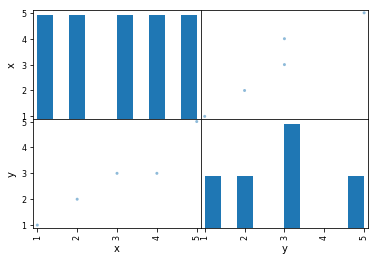

In [16]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may not
change together. The most common method for calculating correlation is Pearson's Correlation
Coecient, that assumes a normal distribution of the attributes involved. A correlation of -1
or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no
correlation at all. Some machine learning algorithms like linear and logistic regression can suer
poor performance if there are highly correlated attributes in your dataset. As such, it is a good
idea to review all of the pairwise correlations of the attributes in your dataset. You can use the
corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [17]:
# Pairwise Pearson correlations

from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

       x      y
x  1.000  0.959
y  0.959  1.000


Where corr(x; y) is the correlation between x and y and stdev() is the calculation of the
standard deviation for a variable. Correlation (also known as Pearson's correlation coecient)
is a measure of how related two variables are in the range of -1 to 1. A value of 1 indicates that
the two variables are perfectly positively correlated, they both move in the same direction and
a value of -1 indicates that they are perfectly negatively correlated, when one moves the other
moves in the other direction.
Standard deviation is a measure of how much on average the data is spread out from the
mean. You can use the function PEARSON() in your spreadsheet to calculate the correlation of x
and y as 0.852 (highly correlated) and the function STDEV() to calculate the standard deviation
of x as 1.5811 and y as 1.4832. Plugging these values in we have:


B1 = 0:852802865 * 1.483239697 / 1.58113883
B1 = 0:8

## Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or
squashed in one direction or another. Many machine learning algorithms assume a Gaussian
distribution. Knowing that an attribute has a skew may allow you to perform data preparation
to correct the skew and later improve the accuracy of your models. You can calculate the skew
of each attribute using the skew() function on the Pandas DataFrame.

In [18]:
skew = dataset.skew()
print(skew)

x    0.000
y    0.552
dtype: float64


## Understand Your Data With Visualization
You must understand your data in order to get the best results from machine learning algorithms.
The fastest way to learn more about your data is to use data visualization. In this chapter you
will discover exactly how you can visualize your machine learning data in Python using Pandas.
Recipes in this chapter use the Pima Indians onset of diabetes dataset introduced in Chapter 4.
Let's get started.

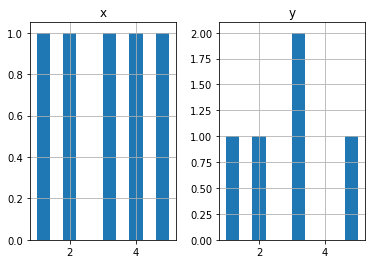

In [19]:
dataset.hist()
pyplot.show()

## Density Plots

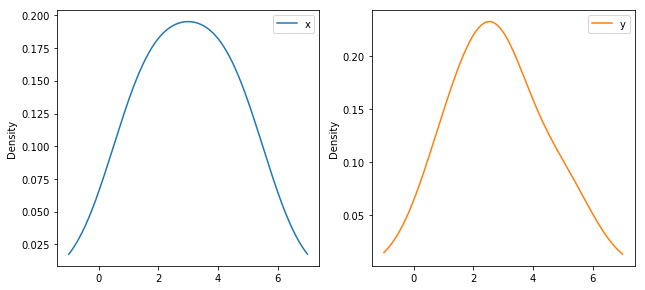

In [20]:
dataset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(16, 16))
pyplot.show()

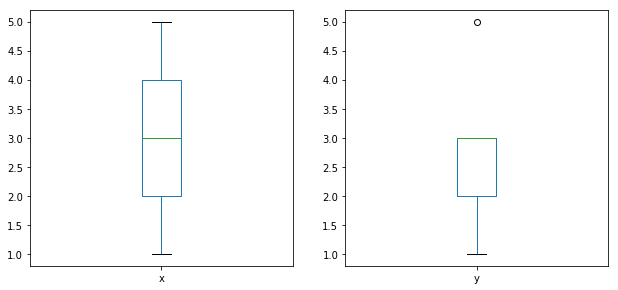

In [21]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(16, 16))
pyplot.show()

NameError: name 'names' is not defined

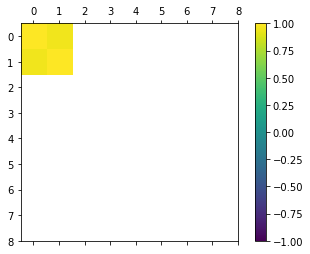

In [22]:
# Correlation Matrix Plot

import numpy

correlations = dataset.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [23]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

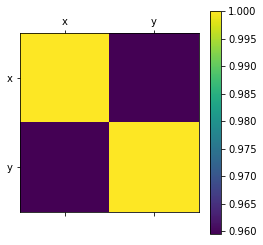

In [24]:
plt.matshow(dataset.corr())
plt.xticks(range(len(dataset.columns)), dataset.columns)
plt.yticks(range(len(dataset.columns)), dataset.columns)
plt.colorbar()
plt.show()

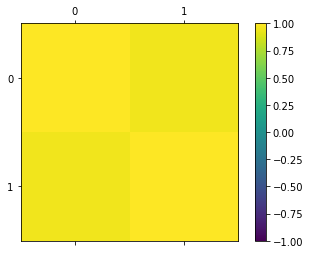

In [25]:
correlations = dataset.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

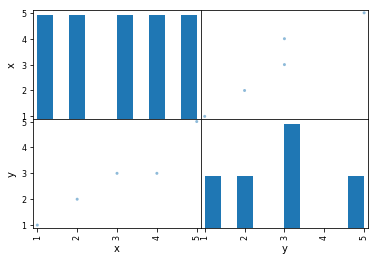

In [26]:
# Scatterplot Matrix
from matplotlib import pyplot

from pandas.plotting import scatter_matrix

scatter_matrix(dataset)
pyplot.show()

## Regression Metrics

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [28]:
array_mae = dataset.values
X_mae = array_mae[:,0:1]
Y_mae = array_mae[:,1]


In [29]:
kfold = KFold(n_splits=2, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X_mae, Y_mae, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

MAE: -1.750 (1.250)


## Mean Squared Error

In [30]:
array_mse = dataset.values
X_mse = array_mse[:,0:1]
Y_mse = array_mse[:,1]
kfold = KFold(n_splits=2, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X_mse, Y_mse, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

MSE: -5.083 (4.583)


## R2 Metric

In [31]:
# Cross Validation Regression R^2

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

array_r2 = dataset.values
X_r2 = array_r2[:,0:1]
Y_r2 = array_r2[:,1]
kfold = KFold(n_splits=2, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X_r2, Y_r2, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: -6.500 (7.000)


# Linear Machine Learning Algorithms

In [32]:
# Linear Regression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

array_lr = dataset.values
X_lr = array_lr[:,0:1]
Y_lr = array_lr[:,1]
kfold = KFold(n_splits=2, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X_lr, Y_lr, cv=kfold, scoring=scoring)
print(results.mean())

-5.083333333333331


## Import libraries

In [1]:
# Load libraries
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

x  y
0  1  1
1  2  2
2  3  3
3  4  3
4  5  5

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 dierent models to predict species from 
ower measurements
4. Select the best model.


## Create a Validation Dataset

In [25]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:1]
Y = array[:,1]
#validation_size = 0.20
#seed = 7
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
#test_size=validation_size, random_state=seed)

In [26]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [27]:
Y

array([1, 2, 3, 3, 5])

In [28]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

array = dataset.values
X = array[:,0:1]
Y = array[:,1]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=2, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.250000 (0.250000)
CART: 0.416667 (0.083333)
NB: 0.416667 (0.083333)
SVM: 0.416667 (0.083333)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.",

In [29]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=2, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 3

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math

In [19]:
d = {'x': [1, 2, 3, 4, 5], 'y': [1, 2, 3, 3, 5]}
dataset = pd.DataFrame(data=d)
dataset

x  y
0  1  1
1  2  2
2  3  3
3  4  3
4  5  5

In [20]:
print('_'*30 + 'NULL VALUES')
dataset.isnull().sum()

______________________________NULL VALUES


x    0
y    0
dtype: int64

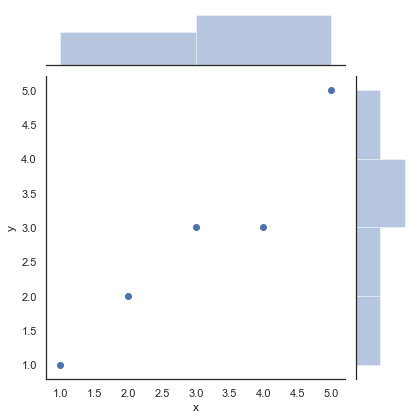

In [32]:
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
p = sns.jointplot(data=dataset,x='x', y='y')

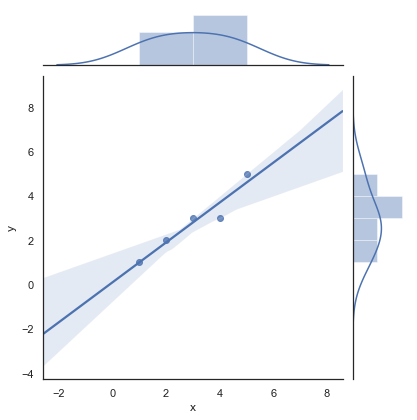

In [34]:
 g = sns.jointplot("x", "y", data=dataset, kind="reg")

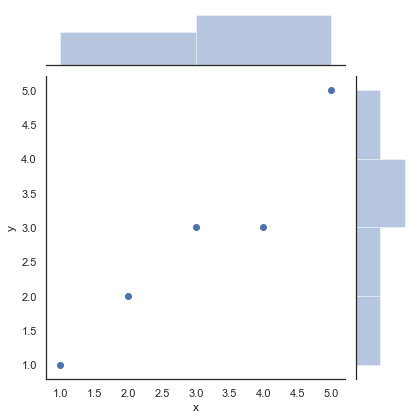

In [35]:
sns.jointplot(data = dataset, x = 'x', y ='y')

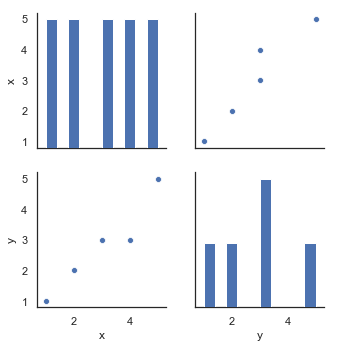

In [36]:
sns.pairplot(dataset)

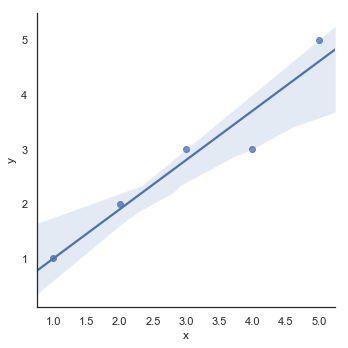

In [37]:
sns.lmplot(data = dataset, x = 'x', y ='y')
#sns.lmplot(data = dataset, x = 'OUTDOOR_TEMP', y ='ELECTRIC_POWER')

https://koldopina.com/regresion-lineal-simple/


## Creamos los datos de entrenamiento y testeo.

En primer lugar, creamos una variable X con los datos de la temperatura exterior, y una variable y con los datos de la potencia eléctrica.

In [38]:
X = dataset['x'].values.reshape(-1,1)
y = dataset['y'].values.reshape(-1,1)

In [39]:
X

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [40]:
y

array([[1],
       [2],
       [3],
       [3],
       [5]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=10)

In [42]:
X_train

array([[1],
       [5],
       [2]])

In [43]:
X_test

array([[3],
       [4]])

In [44]:
y_train

array([[1],
       [5],
       [2]])

In [45]:
y_test

array([[3],
       [3]])

## Creamos el modelo y lo entrenamos.

Usaremos el modelo LinearRegression del módulo linear_model de sklearn.

Creamos una instancia del modelo:

In [46]:
lm = LinearRegression()

Y lo entrenamos con los datos de entrenamiento:

In [47]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Le pedimos al modelo la pendiente y el término independiente de la recta:

In [48]:
slope = lm.coef_
intercept = lm.intercept_

print ('La recta de regresión es: y = %f + %f * X'%(lm.intercept_, slope))

La recta de regresión es: y = -0.000000 + 1.000000 * X


Hacemos la predicción con los datos de test.

In [51]:
predictions = lm.predict(X_test)

In [52]:
predictions

array([[3.],
       [4.]])

Dibujamos los datos de la predicción frente a los reales:

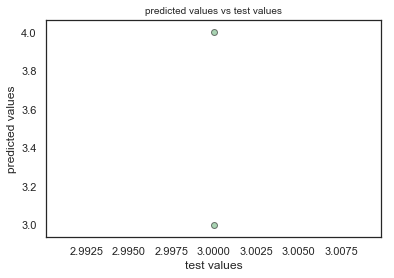

In [53]:
plt.scatter(y_test, predictions, c='g', edgecolors=(0, 0, 0), alpha=0.5)
plt.title('predicted values vs test values', fontsize=10)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

## Evaluación del modelo.

Calculamos las mismas metricas que calculamos para nuestro modelo ‘cincel y martillo’, pero esta vez utilizando el módulo metrics de sklearn.

In [54]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))

MAE:  0.5000000000000002


In [55]:
print('MSE: ', metrics.mean_squared_error(y_test, predictions))

MSE:  0.5


In [56]:
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE:  0.7071067811865476


In [58]:
print ('explained_variance_score', metrics.explained_variance_score(y_test, predictions))
print ('r2_score', metrics.r2_score(y_test, predictions))

explained_variance_score 0.0
r2_score 0.0


In [10]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:1]
Y = array[:,1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

## Build Models
We don't know which algorithms would be good on this problem or what congurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six dierent algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classication and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable. Let's build and evaluate our ve models:

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :]) 


clf.score(X, y)

In [11]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))


In [12]:
# evaluate each model in turn
results = []
names = []

In [14]:
for name, model in models:
    kfold = KFold(n_splits=2)#, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: n_splits=3 cannot be greater than the number of members in each class.

In [5]:
kfold = KFold(n_splits=2)#, random_state=seed)

In [ ]:
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')

In [6]:
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

NameError: name 'cv_results' is not defined

In [ ]:
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))